# Машинное обучение, DS-поток
## Домашнее задание 4

**Правила:**

* Дедлайн **13 марта 02:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ml] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Теоретические задачи необходимо оформить в markdown или же прислать фотку в правильной ориентации рукописного решения, где все четко видно.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  3 балла
* Задача 2 -  7 баллов
* Задача 3 -  3 балла

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

### Задача 1

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$. 
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите bias-variance разложение. Компонентну, отвечающую за разброс, разрешается не доводить до конца, как это было сделано на семинаре.

### Решение  


### Задача 2

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Используйте класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` - целочисленные признаки. Остальные признаки - вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [10]:
housing = fetch_california_housing()
X, y = housing.data[:10000], housing.target[:10000]

In [11]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

In [13]:
def get_test_mse(param_name, grid):
    test_mse = []
    for param_value in tqdm(grid):
        estimator = RandomForestRegressor(**{param_name: param_value})
        estimator.fit(X_train, y_train)
        test_mse.append(mse(y_test, estimator.predict(X_test)))
    return test_mse

def plot_mse_dependence(param_name, grid=range(1, 101), title=''):
    plt.figure(figsize=(12, 6))
    test_mse = get_test_mse(param_name, grid)
    plt.plot(grid, test_mse, label='test', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(title, fontsize=20)
    plt.show()

100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


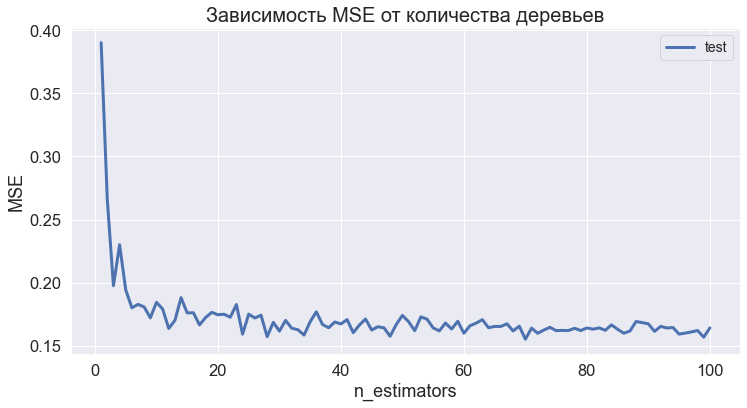

In [6]:
plot_mse_dependence('n_estimators', range(1, 101), title='Зависимость MSE от количества деревьев')

100%|██████████| 22/22 [01:08<00:00,  3.13s/it]


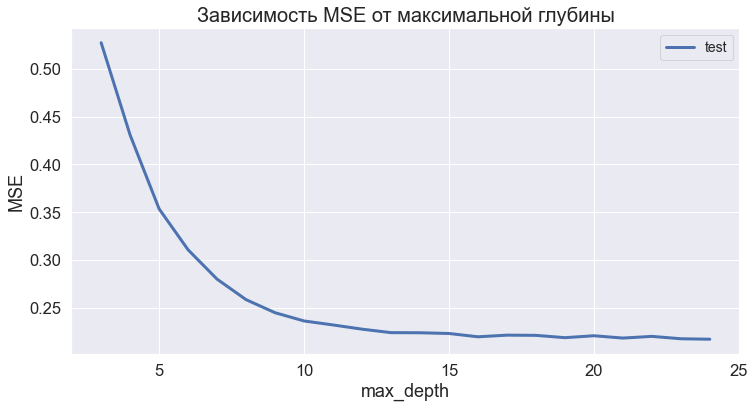

In [14]:
plot_mse_dependence('max_depth', range(3, 25), title='Зависимость MSE от максимальной глубины')

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров при достаточно больших значениях параметров?

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для решающего леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** 

1. На графике зависимости MSE от n_estimators видно, что при увеличении количество деревьев наше MSE не начинает увеличиваться на тестовой выборке, а значит дерево не переобучается. Аналогично с зависимостью от max_depth. Наоборот, увеличение обоих показателей уменьшает MSE. 

2. При достаточно больших значениях параметра MSE практически не меняется, значит качество предсказаний остается примерно на одном уровне. Можно сделать вывод, что нет смысла бесконечно увеличивать оба этих параметра.  

3. Заметим сначала, что это зависит от количество деревьев в RandomForest. Если деревьев будет мало, и все они буду максимальной глубины - мы переобучимся. При большом количестве деревьев из bias-variance-tradeoff видно, что смещение не меняется (т.е. точность предсказаний на тесте), но при этом уменьшается variance(если деревья не сильно скоррелированы). Таким образом у нас улучшается точность предсказаний. Но при этом в любом случае случайный лес меньше подвержен переобучению, чем просто дерево. То есть можно не ограничивать глубину дерева, т.к. это уменьшает попарную корреляцию (т.к. деревья переобучиваются по-разному), при это каждое дерево становится менее смещенным.

Обучите случайный лес с параметрами по умолчанию и выведите mse на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются?

In [8]:
num_iters = 3
rf_results = []
for i in range(num_iters):
    estimator = RandomForestRegressor()
    estimator.fit(X_train, y_train)
    print("MSE на {} эксперименте: {}".format(i+1, mse(y_test, estimator.predict(X_test))))
    rf_results.append(mse(y_test, estimator.predict(X_test)))

MSE на 1 эксперименте: 0.25742117724698843
MSE на 2 эксперименте: 0.257965488482723
MSE на 3 эксперименте: 0.25829956837120466


**Ответ:** видно, что все результаты отличаются незначительно. Разными же результаты получается, т.к. в каждом дереве, в каждой вершине этого дерева, случайно выбираются d признаков, по которым происходит поиск наилучшего разбиения.  
То есть в самом построении есть элемент случайности, отсюда и разные результаты.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [9]:
random_forest_gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                                        param_grid={'max_depth': np.array(np.arange(3, 25)),
                                                    'n_estimators': [1, 10, 25, 50, 75, 100]},
                                        scoring='neg_mean_squared_error',
                                        verbose=10,
                                        n_jobs=-1)

random_forest_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

Выведите найденные оптимальные параметры.

In [10]:
print('Наилучшие параметры: ', random_forest_gridsearch.best_params_)

Наилучшие параметры:  {'max_depth': 21, 'n_estimators': 100}


Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [11]:
max_depth = random_forest_gridsearch.best_params_['max_depth']
n_estimators = random_forest_gridsearch.best_params_['n_estimators']

Оценим качество предсказаний обученного решающего леса.

In [12]:
model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
model.fit(X_train, y_train)
print('MSE решающего леса с оптимальными параметрами на тесте: ' + \
      str(mse(y_test, model.predict(X_test))))

MSE решающего леса с оптимальными параметрами на тесте: 0.2559987733816821


Как видно, оптимальная модель имеет не максимальные параметры глубины из тех, что рассматривались в gridsearch. Т.е. не всегда увеличение параметров ведет к улучшению предсказаний. 

Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [13]:
def get_test_train_mse(param_name, grid):
    train_mse, test_mse = [], []
    for param_value in tqdm(grid):
        estimator = RandomForestRegressor(**{param_name: param_value,
                                             'max_depth': max_depth,
                                             'n_estimators': n_estimators})
        estimator.fit(X_train, y_train)
        train_mse.append(mse(y_train, estimator.predict(X_train)))
        test_mse.append(mse(y_test, estimator.predict(X_test)))
    return train_mse, test_mse

def plot_test_train_mse_dependence(param_name, grid=range(1, 101), title=''):
    plt.figure(figsize=(12, 6))
    train_mse, test_mse = get_test_train_mse(param_name, grid)
    plt.plot(grid, test_mse, label='test', lw=3)
    plt.plot(grid, train_mse, label='train', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(title, fontsize=20)
    plt.show()

Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

100%|██████████| 8/8 [00:49<00:00,  6.24s/it]


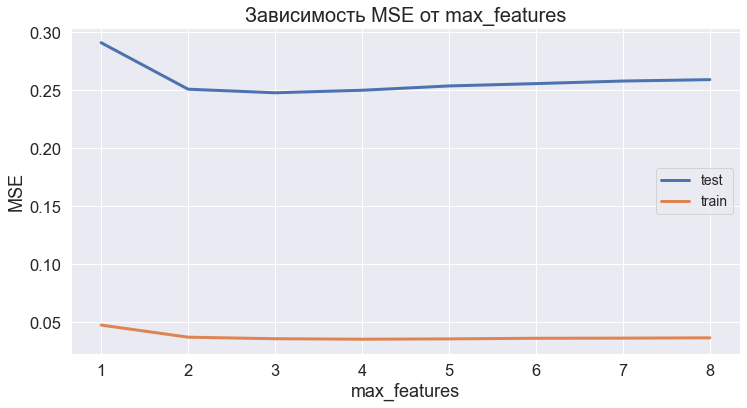

In [14]:
plot_test_train_mse_dependence('max_features', np.arange(1, 9), title='Зависимость MSE от max_features')

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** 
Отвечаю сразу на два пункта:  
1. Как видно, оптимальное количество вершин, участвующих в разбиении для test: 3 или 4. Это значит, что именно при таком разбиении получается найти оптимальный баланс между скоррелированностью деревьев и оптимальностью каждого отдельного дерева (т.к. больше признаков перебирает => лучше уловит зависимости).
2. При увеличении n_features увеличивается скоррелированность деревьев. Т.к. хоть они и обучаются по разным выборкам, но при этом если выборки достаточного размера, а бутстреп делается ~ размера выборки, то обучаются они на достаточно похожих выборках. Из-за этого все деревья становятся больше похожи друг на друга, их коррелированность возрастает, случайный лес становится менее случайным, а т.е. и хуже. Но при этом на train он предсказывает лучше, т.к. по нему и учился.

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее. Поскольку результаты эксперимента могут сильно зависеть от того, какой набор признаков задан изначально, проведите несколько экспериментов для каждого значения `n_features`. 

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` -- базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`
* `max_features` -- количество признаков для каждой базовой модели
* `n_estimators` -- количество базовых моделей.

Постройте графики `mse` на обучающей и на валидационной выборке.

100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


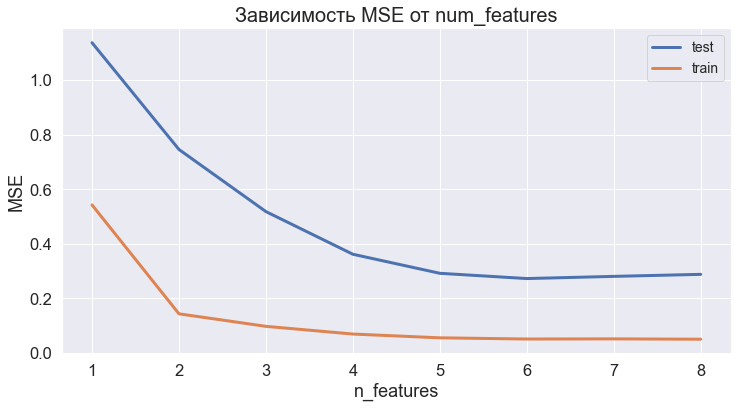

In [15]:
n_experiments = 5
n_features = np.arange(1, 9)

train_mse, test_mse = [], []
for n in tqdm(n_features):
    train_mse_for_n, test_mse_for_n = [], []
    for i in range(n_experiments):
        bagging_regr_model = BaggingRegressor(DecisionTreeRegressor(), max_features=n)
        bagging_regr_model.fit(X_train, y_train)
        train_mse_for_n.append(mse(y_train, bagging_regr_model.predict(X_train)))
        test_mse_for_n.append(mse(y_test, bagging_regr_model.predict(X_test)))
    train_mse.append(np.mean(train_mse_for_n))
    test_mse.append(np.mean(test_mse_for_n))
    
plt.figure(figsize=(12, 6))
plt.plot(n_features, test_mse, label='test', lw=3)
plt.plot(n_features, train_mse, label='train', lw=3)
plt.legend(fontsize=14)
plt.xlabel('n_features')
plt.ylabel('MSE')
plt.title('Зависимость MSE от num_features', fontsize=20)
plt.show()

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу?

Для наглядности сравним наилучший результат BaggingRegressor-а с результатом, получшенным на незатюненном RF.

In [16]:
print("BR: {}".format(np.min(test_mse)))
print("RF: {}".format(np.max(rf_results)))
print("Rf лучше BR на {}".format(np.min(test_mse) - np.max(rf_results)))

BR: 0.27264674037476466
RF: 0.25829956837120466
Rf лучше BR на 0.014347172003560005


**Вывод.**

Во-первых отметим, что RandomForest справился лучше BaggingRegressor-а. Причем, относительно BR результаты RF на 5% лучше.  

Это легко объяснить: RF генерирует набор фичей не для каждого дерева, а для каждого узла. Т.е. каждое дерево в RF по сути может пробежаться по всем признакам хотя бы на какой-то глубине, и это повышает точность предсказаний. BR же фиксирует признаки для каждого дерева, и если важные признаки не попали в данное дерево, то оно будет предсказывать чушь,и плохо влиять на суммарное предсказание. Но таких будет немного, поэтому предсказания будут не слишком плохими.

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

Во второй мы фиксируем ОДИНАКОВЫЕ n признаков для каждого дерева, т.е. это просто ужасно, например, если выбрались неудачные признаки, то наш BR будет предсказывать очень плохо.

### Задача 3

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса.
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели.

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним. Какую оценку коэффициента корреляции вы используете и почему?

#### Решающие деревья

In [21]:
random_forest = RandomForestRegressor(100)
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
predicted = []
for i in range(100):
    predicted.append(random_forest.estimators_[i].predict(X_train))

(array([ 632., 2656., 3045., 2847., 2127., 1402.,  914.,  573.,  362.,
         922.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

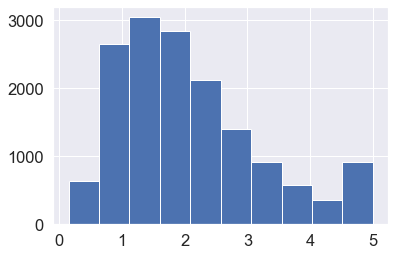

In [43]:
plt.hist(predicted[0])

In [44]:
Y_pred = np.array(predicted)
cor_matrix = pd.DataFrame(Y_pred.T).corr(method='spearman')
# т.к. считает для колонок, то Y_pred.T

In [45]:
cor_matrix

0         1         2         3         4         5         6   \
0   1.000000  0.875473  0.868351  0.878117  0.876450  0.881638  0.886541   
1   0.875473  1.000000  0.867156  0.876613  0.871702  0.878886  0.883027   
2   0.868351  0.867156  1.000000  0.867644  0.867865  0.870017  0.876345   
3   0.878117  0.876613  0.867644  1.000000  0.876132  0.885272  0.882853   
4   0.876450  0.871702  0.867865  0.876132  1.000000  0.881103  0.884454   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.884152  0.879115  0.870026  0.882940  0.878322  0.885100  0.886010   
96  0.877526  0.875267  0.866294  0.878568  0.875240  0.886051  0.884049   
97  0.874167  0.872694  0.865764  0.876816  0.874485  0.882523  0.880614   
98  0.869892  0.867568  0.860212  0.870698  0.865513  0.871574  0.876272   
99  0.877481  0.876053  0.870458  0.881691  0.876106  0.883963  0.885235   

          7         8         9   ...        90        91        92        93  \
0   0.882569  0.882401  0.876835  ...  0.875545  0.877012  0.884668  0.879799   
1   0.879187  0.878498  0.875556  ...  0.874064  0.872469  0.881094  0.872168   
2   0.874693  0.872587  0.865177  ...  0.867248  0.867154  0.871409  0.866666   
3   0.885796  0.882038  0.874174  ...  0.879237  0.878320  0.883982  0.880283   
4   0.877733  0.877742  0.872705  ...  0.872435  0.875180  0.878329  0.873607   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.886416  0.883831  0.878192  ...  0.883438  0.878283  0.890141  0.881221   
96  0.887405  0.879642  0.877261  ...  0.878876  0.878752  0.880920  0.876773   
97  0.881454  0.878985  0.873268  ...  0.876345  0.876900  0.879798  0.876952   
98  0.874649  0.870496  0.867708  ...  0.870614  0.865474  0.874969  0.869626   
99  0.885250  0.883299  0.877998  ...  0.879337  0.877546  0.884678  0.878092   

          94        95        96        97        98        99  
0   0.880728  0.884152  0.877526  0.874167  0.869892  0.877481  
1   0.876970  0.879115  0.875267  0.872694  0.867568  0.876053  
2   0.869460  0.870026  0.866294  0.865764  0.860212  0.870458  
3   0.881577  0.882940  0.878568  0.876816  0.870698  0.881691  
4   0.878042  0.878322  0.875240  0.874485  0.865513  0.876106  
..       ...       ...       ...       ...       ...       ...  
95  0.884661  1.000000  0.882709  0.878931  0.873981  0.882744  
96  0.882513  0.882709  1.000000  0.877659  0.870565  0.878794  
97  0.877987  0.878931  0.877659  1.000000  0.864693  0.875513  
98  0.870303  0.873981  0.870565  0.864693  1.000000  0.871281  
99  0.879823  0.882744  0.878794  0.875513  0.871281  1.000000  

[100 rows x 100 columns]

Используем Спирмена для оценки корреляции, т.к. выборка не из нормального, а значит Пирсона не можем. Заметили это по гистограмме.

In [52]:
np.mean(cor_matrix.to_numpy() - np.eye(100))

0.871419282241283

In [57]:
a = [1, 0 ,3]
np.nonzero(a)[0]

array([0, 2])